In [119]:
import pandas as pd

In [120]:
pred_PLS_SM = pd.read_csv("./data/data/PLS_SM/tar_pred.csv")
pred_PLS_SM.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

pred_ICA = pd.read_csv("./data/data/jade/ica/tar_pred.csv")
pred_ICA["Sample Name"] = pred_ICA["target"]
pred_ICA.drop(columns=["target"], axis=1, inplace=True)

In [121]:
pred_ICA.columns

Index(['ID', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MgO', 'CaO', 'Na2O', 'K2O',
       'Sample Name'],
      dtype='object')

In [122]:
pred_ICA.head()

,ID,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
0,jsc1399_2013_09_11_151245_ccs,45.317825,1.649853,12.047759,9.512644,7.427474,8.307616,1.154628,0.973537,jsc1399
1,r65_2013_11_05_151321_ccs,65.086114,0.698472,19.352774,11.412006,4.965115,3.826492,2.332870,1.101042,r65
2,vzo106_2013_09_03_181628_ccs,66.583619,0.481316,9.294991,7.362271,-0.221118,0.618792,1.364755,3.212182,vzo106
3,201424_2013_11_06_155255_ccs,68.045777,1.412467,8.408171,3.832675,2.064138,2.757270,0.714208,3.448486,201424
4,jsc1424_2013_09_16_145015_ccs,53.593515,1.376046,12.352034,17.038374,3.745336,4.445116,3.796766,1.472840,jsc1424


In [123]:
ids_to_keep = pred_ICA["ID"]
filtered_pred_PLS_SM = pred_PLS_SM[pred_PLS_SM['ID'].isin(ids_to_keep)]

In [124]:
filtered_pred_PLS_SM.set_index("ID", inplace=True)
pred_ICA.set_index("ID", inplace=True)

In [125]:
aligned_pred_ICA, aligned_pred_PLS_SM = filtered_pred_PLS_SM.align(pred_ICA, join="inner", axis=0)

In [126]:
aligned_pred_PLS_SM

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name
ID,,,,,,,,,
g24mt_2013_10_09_160456_ccs,58.691427,1.438007,17.655871,6.774061,2.679376,-0.165819,2.249622,3.256702,g24mt
gbw07216a_2013_08_07_155234_ccs,18.373416,0.582722,-0.711422,8.097996,13.518271,26.146285,0.712223,-1.162083,gbw07216a
201427_2013_11_06_163042_ccs,50.428061,1.965655,18.071524,11.531135,3.529033,7.495934,1.901806,0.837470,201427
pl1b_2013_10_29_155444_ccs,68.580325,0.787594,15.237530,2.308604,0.797362,0.067977,0.394502,3.079194,pl1b
mnk_2013_10_25_153003_ccs,67.416847,0.708802,16.278063,4.347409,2.444249,8.442489,1.184563,0.109622,mnk
...,...,...,...,...,...,...,...,...,...
pg2_2013_10_28_185928_ccs,72.082229,0.594027,15.820050,1.425973,1.208558,-1.316781,0.698800,4.550117,pg2
lp28_2013_10_23_154612_ccs,59.229987,0.903667,8.247578,12.892435,2.320217,1.366559,0.894263,1.871197,lp28
guwgna_2013_08_08_152732_ccs,56.773196,0.414050,12.573894,7.696833,3.825016,-1.730313,1.099569,2.179542,guwgna


In [127]:
from lib.reproduction import weighted_sum_oxide_percentages, major_oxides

merged_df = pd.merge(aligned_pred_ICA, aligned_pred_PLS_SM, on='Sample Name', suffixes=('_ICA', '_PLS_SM'))
moc_predictions = pd.DataFrame()

for oxide in major_oxides:
    w_ica = weighted_sum_oxide_percentages[oxide]['ICA'] / 100
    w_pls_sm = weighted_sum_oxide_percentages[oxide]['PLS1-SM'] / 100
    moc_predictions[oxide] = merged_df[oxide + '_ICA'] * w_ica + merged_df[oxide + '_PLS_SM'] * w_pls_sm

moc_predictions['Sample Name'] = merged_df['Sample Name']
moc_predictions['ID'] = aligned_pred_ICA.index

In [128]:
moc_predictions

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O,Sample Name,ID
0,65.577487,1.443736,17.886641,7.426861,2.580890,0.133765,2.565263,2.906138,g24mt,g24mt_2013_10_09_160456_ccs
1,-0.521747,-0.292981,-0.373093,3.786674,15.620766,31.337447,0.206188,-1.135275,gbw07216a,gbw07216a_2013_08_07_155234_ccs
2,59.278970,1.791544,19.366268,13.202392,3.077526,5.175328,2.262733,2.002184,201427,201427_2013_11_06_163042_ccs
3,71.277944,0.620702,17.149212,1.949819,1.137345,0.159800,0.385383,2.637902,pl1b,pl1b_2013_10_29_155444_ccs
4,76.292865,-0.388389,13.995415,0.067048,1.933398,3.549467,-0.027495,-0.150225,mnk,mnk_2013_10_25_153003_ccs
...,...,...,...,...,...,...,...,...,...,...
66,72.454862,0.644431,17.474285,0.987383,2.086686,-0.474096,0.485891,4.596937,pg2,pg2_2013_10_28_185928_ccs
67,34.779982,1.350033,14.202208,2.815959,2.573969,0.436413,-0.244029,-2.133084,lp28,lp28_2013_10_23_154612_ccs
68,75.806240,0.662619,12.635616,3.394269,2.208272,-0.620851,-0.354887,4.224268,guwgna,guwgna_2013_08_08_152732_ccs
69,65.128955,0.579125,18.881654,3.764570,2.643567,1.892855,4.200716,2.187239,130,130_2013_10_01_140915_ccs


In [129]:
from lib.data_handling import CompositionData

cd = CompositionData("data/data/calib/ccam_calibration_compositions.csv")

In [143]:
def merge_with_actual_data(moc_predictions):
    merged_data = pd.DataFrame()

    for index, row in moc_predictions.iterrows():
        actual_data = cd.get_composition_for_sample(row['Sample Name'])

        if not actual_data.empty:
            for oxide in major_oxides:
                merged_data.at[index, oxide + '_pred'] = row[oxide]
                merged_data.at[index, oxide + '_actual'] = actual_data[oxide].values[0]
            merged_data.at[index, 'Sample Name'] = row['Sample Name']

    return merged_data

In [144]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(merged_data):
    rmse_values = {}
    for oxide in major_oxides:
        y_actual = merged_data[oxide + '_actual']
        y_pred = merged_data[oxide + '_pred']
        rmse = mean_squared_error(y_actual, y_pred, squared=False)
        rmse_values[oxide] = rmse
    return rmse_values

# Usage example
merged_data = merge_with_actual_data(moc_predictions)
rmse_values = calculate_rmse(merged_data)

In [151]:
pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], merged_data[["SiO2_actual", "SiO2_pred", "Sample Name"]], on="Sample Name")

,SiO2_ICA,SiO2_PLS_SM,Sample Name,SiO2_actual,SiO2_pred
0,72.463547,58.691427,g24mt,59.73,65.577487
1,-19.416910,18.373416,gbw07216a,0.05,-0.521747
2,68.129880,50.428061,201427,50.55,59.278970
3,73.975562,68.580325,pl1b,63.51,71.277944
4,85.168882,67.416847,mnk,84.9,76.292865
...,...,...,...,...,...
66,72.827496,72.082229,pg2,56.97,72.454862
67,10.329976,59.229987,lp28,56.5,34.779982
68,94.839285,56.773196,guwgna,71.47,75.806240
69,65.235752,65.022158,130,57.9,65.128955


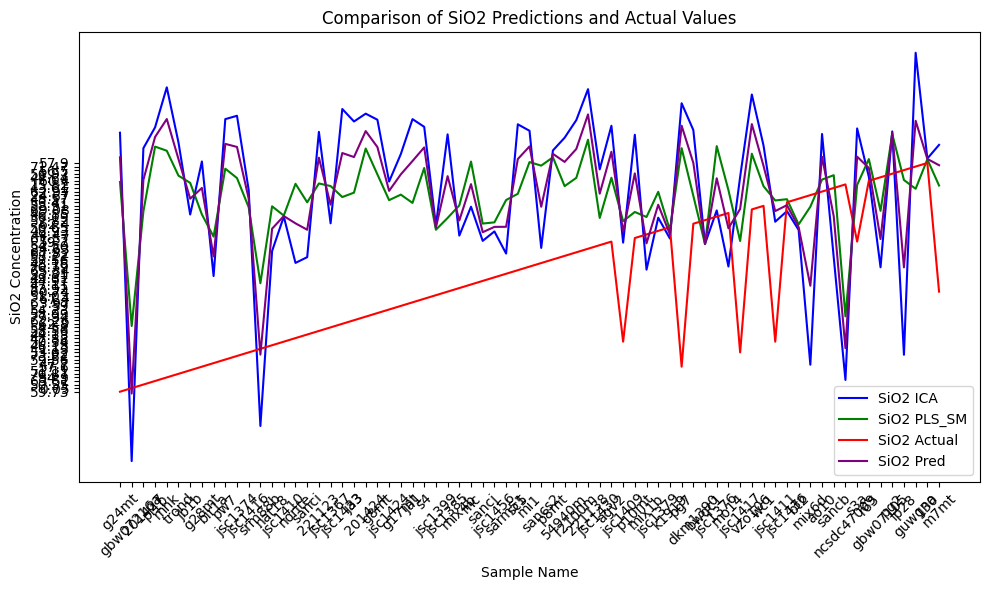

In [152]:
import matplotlib.pyplot as plt

# Assuming the merged DataFrame is named 'final_df'
final_df = pd.merge(merged_df[["SiO2_ICA", "SiO2_PLS_SM", "Sample Name"]], 
                    merged_data[["SiO2_actual", "SiO2_pred", "Sample Name"]], 
                    on="Sample Name")

# Plotting
plt.figure(figsize=(10, 6))

# Each column as a line
plt.plot(final_df['Sample Name'], final_df['SiO2_ICA'], label='SiO2 ICA', color='blue')
plt.plot(final_df['Sample Name'], final_df['SiO2_PLS_SM'], label='SiO2 PLS_SM', color='green')
plt.plot(final_df['Sample Name'], final_df['SiO2_actual'], label='SiO2 Actual', color='red')
plt.plot(final_df['Sample Name'], final_df['SiO2_pred'], label='SiO2 Pred', color='purple')

# Adding legend, labels and title
plt.legend()
plt.xlabel('Sample Name')
plt.ylabel('SiO2 Concentration')
plt.title('Comparison of SiO2 Predictions and Actual Values')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability if needed

# Show the plot
plt.tight_layout()
plt.show()


In [145]:
merged_data

,SiO2_pred,SiO2_actual,TiO2_pred,TiO2_actual,Al2O3_pred,Al2O3_actual,FeOT_pred,FeOT_actual,MgO_pred,MgO_actual,CaO_pred,CaO_actual,Na2O_pred,Na2O_actual,K2O_pred,K2O_actual,Sample Name
0,65.577487,59.73,1.443736,0.72,17.886641,16.95,7.426861,8.39,2.580890,3.07,0.133765,0.96,2.565263,2.34,2.906138,3.82,g24mt
1,-0.521747,0.05,-0.292981,0,-0.373093,0.24,3.786674,0.45,15.620766,17.88,31.337447,35.02,0.206188,0.01,-1.135275,0,gbw07216a
2,59.278970,50.55,1.791544,2.17,19.366268,28.13,13.202392,10.03,3.077526,3.19,5.175328,2.02,2.262733,2.19,2.002184,1.38,201427
3,71.277944,63.51,0.620702,0.73,17.149212,18.76,1.949819,4.71,1.137345,1.53,0.159800,0.37,0.385383,0.17,2.637902,4.09,pl1b
4,76.292865,84.9,-0.388389,0.03,13.995415,11.60,0.067048,1.08,1.933398,2.1,3.549467,0.02,-0.027495,0.15,-0.150225,0.02,mnk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,72.454862,56.97,0.644431,0.46,17.474285,25.58,0.987383,3.83,2.086686,2.71,-0.474096,0.01,0.485891,0.4,4.596937,5.08,pg2
67,34.779982,56.5,1.350033,1.6,14.202208,14.00,2.815959,12.96,2.573969,5.74,0.436413,4.40,-0.244029,1.49,-2.133084,0.94,lp28
68,75.806240,71.47,0.662619,0.02,12.635616,14.70,3.394269,5.33,2.208272,0.03,-0.620851,0.62,-0.354887,0.08,4.224268,2.63,guwgna
69,65.128955,57.9,0.579125,0.65,18.881654,16.60,3.764570,7.22,2.643567,3.81,1.892855,4.52,4.200716,4.61,2.187239,1.33,130


In [147]:
rmse_values

{'SiO2': 6.961497805922108,
 'TiO2': 0.5068987522332382,
 'Al2O3': 3.772448436109522,
 'FeOT': 3.6095792198770895,
 'MgO': 1.84652106453656,
 'CaO': 5.734211586471701,
 'Na2O': 2.3954719251421537,
 'K2O': 0.9258034786364472}